In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='facebook/opt-350m'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'rank, alpha':[]}

In [4]:
lr = 5.0e-5
wd = 0.0
alphas = [8, 16]
ranks = [8, 16]
lora_dropout = 0.0


for a,r in zip(alphas, ranks):
    print(f'Grid search {model_checkpoint}, learning rate {lr} wd: {wd}, Lora alpha {a}, rank {r}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=a,
                            dropout=lora_dropout)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['rank, alpha'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search facebook/opt-350m, learning rate 5e-05 wd: 0.0, Lora alpha 8, rank 8


Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.6612	Val Loss:	0.6459	Accuracy:	0.6915	F1:	0.4632
2 / 30: Train Loss:	0.6073	Val Loss:	0.5955	Accuracy:	0.7155	F1:	0.4871
3 / 30: Train Loss:	0.5809	Val Loss:	0.5499	Accuracy:	0.7374	F1:	0.5741
4 / 30: Train Loss:	0.5538	Val Loss:	0.5291	Accuracy:	0.7330	F1:	0.6123
5 / 30: Train Loss:	0.5498	Val Loss:	0.4969	Accuracy:	0.7484	F1:	0.6134
6 / 30: Train Loss:	0.5201	Val Loss:	0.4872	Accuracy:	0.7571	F1:	0.6078
7 / 30: Train Loss:	0.5192	Val Loss:	0.4919	Accuracy:	0.7527	F1:	0.5972
8 / 30: Train Loss:	0.5106	Val Loss:	0.4762	Accuracy:	0.7659	F1:	0.6314
9 / 30: Train Loss:	0.5012	Val Loss:	0.4733	Accuracy:	0.7702	F1:	0.6470
10 / 30: Train Loss:	0.4947	Val Loss:	0.4862	Accuracy:	0.7790	F1:	0.6399
11 / 30: Train Loss:	0.4892	Val Loss:	0.4706	Accuracy:	0.7812	F1:	0.6541
12 / 30: Train Loss:	0.4891	Val Loss:	0.4487	Accuracy:	0.7856	F1:	0.6666
13 / 30: Train Loss:	0.4730	Val Loss:	0.4516	Accuracy:	0.7899	F1:	0.6622
14 / 30: Train Loss:	0.4829	Val Loss:	0.4478	Accuracy:	0.785

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.6556	Val Loss:	0.6331	Accuracy:	0.6893	F1:	0.4915
2 / 30: Train Loss:	0.5947	Val Loss:	0.5701	Accuracy:	0.7133	F1:	0.5561
3 / 30: Train Loss:	0.5651	Val Loss:	0.5229	Accuracy:	0.7374	F1:	0.5814
4 / 30: Train Loss:	0.5300	Val Loss:	0.5153	Accuracy:	0.7462	F1:	0.5883
5 / 30: Train Loss:	0.5266	Val Loss:	0.5088	Accuracy:	0.7571	F1:	0.5971
6 / 30: Train Loss:	0.5137	Val Loss:	0.4909	Accuracy:	0.7637	F1:	0.6264
7 / 30: Train Loss:	0.5058	Val Loss:	0.5014	Accuracy:	0.7571	F1:	0.6144
8 / 30: Train Loss:	0.4971	Val Loss:	0.4684	Accuracy:	0.7790	F1:	0.6578
9 / 30: Train Loss:	0.4900	Val Loss:	0.4526	Accuracy:	0.7877	F1:	0.6659
10 / 30: Train Loss:	0.4852	Val Loss:	0.4422	Accuracy:	0.7899	F1:	0.6467
11 / 30: Train Loss:	0.4842	Val Loss:	0.4377	Accuracy:	0.7856	F1:	0.6426
12 / 30: Train Loss:	0.4843	Val Loss:	0.4296	Accuracy:	0.8118	F1:	0.7324
13 / 30: Train Loss:	0.4775	Val Loss:	0.4367	Accuracy:	0.8031	F1:	0.6688
14 / 30: Train Loss:	0.4952	Val Loss:	0.4227	Accuracy:	0.800

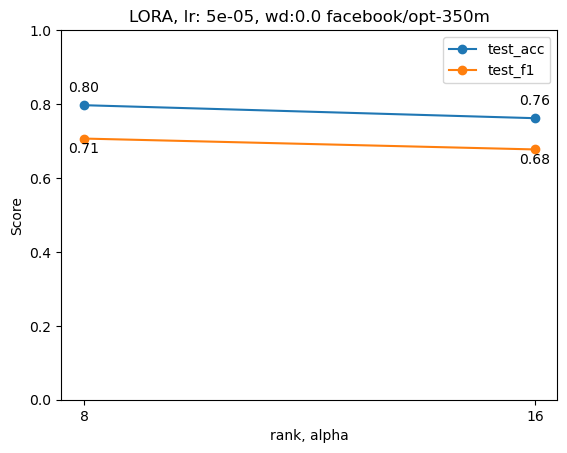

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'LORA, lr: {lr}, wd:{wd} {model_checkpoint}',
                        column='rank, alpha',
                        sci_format=False)

In [6]:
%reset -f